In [38]:
import os
import nibabel as nib
from scipy.spatial import ConvexHull
import helper_functions.visualizations as vis
import helper_functions.reshape_data as rd
import helper_functions.filter_CT as fct
import helper_functions.manipulate_hull as mh
from scipy import ndimage
import numpy as np

In [70]:
root_data_dir = '/Users/akre96/Documents/GradSchool/Class/BE223A/BE223A_2019/data' # Change for different systems
subjects = os.listdir(root_data_dir)

subject = 'subject_2'

preop_CT_path = os.path.join(  
    root_data_dir,
    os.path.join(
        subject,
        'preopCT_' + subject + '.nii'
    )
)

postop_CT_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        'postopCT_' + subject + '.nii'
    )
)

hull_mat_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        'hull.mat'
    )
)

In [71]:
print('\nLOADING CT')
# Load Preop_CT
preop_CT = nib.load(preop_CT_path)
preop_CT_data = preop_CT.get_fdata()

# Load Postop_CT
postop_CT = nib.load(postop_CT_path)
postop_CT_data = postop_CT.get_fdata()


LOADING CT


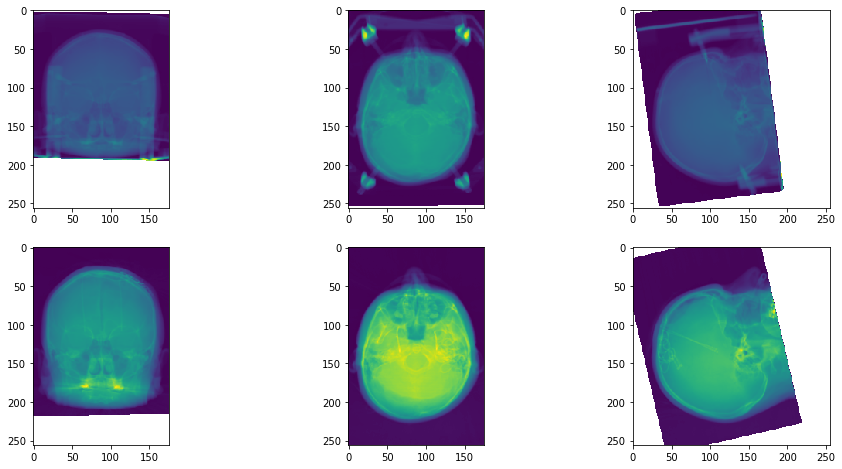

In [72]:
axes = vis.compare_filtered_original(preop_CT_data, postop_CT_data);

In [73]:
print('\nLOADING HULL')
# Load Hull
hull_idx = mh.load_hull_from_mat(hull_mat_path, postop_CT)

print('\nCREATING CONVEX HULL')
# Create convex hull object
point_cloud = hull_idx[:,:3]
hull_hull = ConvexHull(point_cloud)


LOADING HULL

CREATING CONVEX HULL


In [74]:
print('\nFILTERING CT FOR REGIONS WITHIN HULL')
long_postop = rd.voxels_to_4D(fct.min_max_normalize(postop_CT_data), is_norm=True)
post_inside_hull = fct.filter_in_hull(long_postop, hull_hull, filt_out=True)

long_preop = rd.voxels_to_4D(fct.min_max_normalize(preop_CT_data), is_norm=True)
pre_inside_hull = fct.filter_in_hull(long_preop, hull_hull, filt_out=True)



FILTERING CT FOR REGIONS WITHIN HULL
Normalizing from: -1769.7281494140625 3731.664794921875
To range: 0.0 1.0
...Splitting data in to chunks
	Done. Chunks created: 152390
...Creating inputs
	Done
...Computing if chunks in Hull
	Done
Normalizing from: -1584.5986328125 3540.65380859375
To range: 0.0 1.0
...Splitting data in to chunks
	Done. Chunks created: 137611
...Creating inputs
	Done
...Computing if chunks in Hull
	Done


In [75]:
post_inside_hull_vox = rd.long_to_voxels(post_inside_hull, postop_CT_data.shape)
pre_inside_hull_vox = rd.long_to_voxels(pre_inside_hull, preop_CT_data.shape)

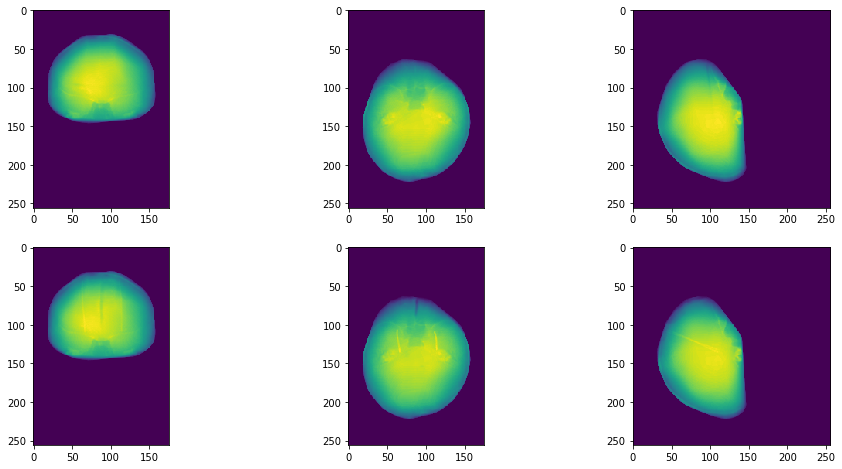

In [76]:
axes = vis.compare_filtered_original(pre_inside_hull_vox, post_inside_hull_vox);

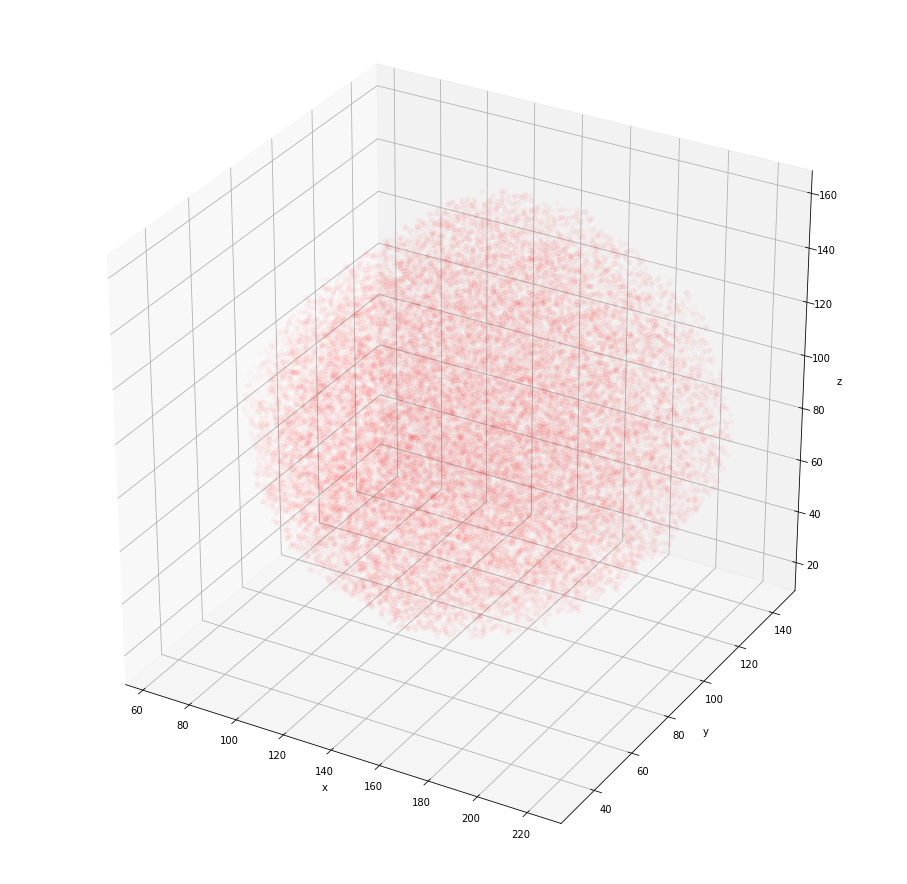

In [77]:
ax = vis.quick_plot_3D(
    post_inside_hull,
    is_long=True,
    is_norm=True,
    alpha_max=0.1,
    base_color=(1,0,0)
)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [137]:
t = .7
thresh_filt = post_inside_hull_vox.copy()
thresh_filt[thresh_filt < t] = 0
thresh_filt[thresh_filt >= t] = 1

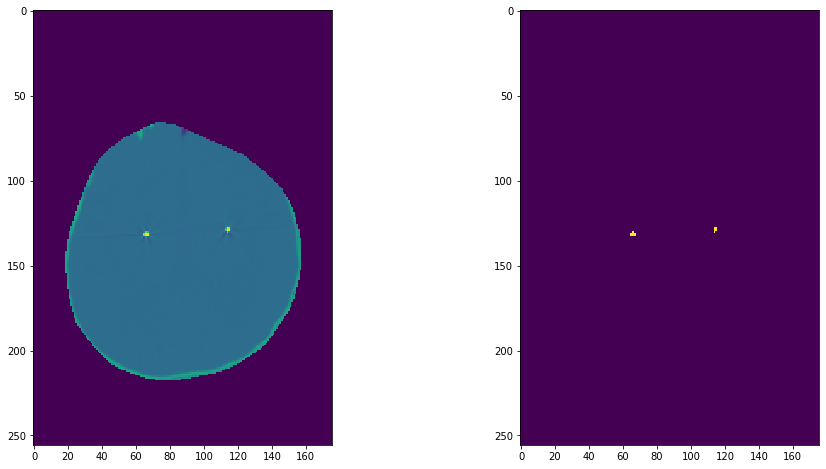

In [138]:
vis.compare_slices(
    [post_inside_hull_vox, thresh_filt],
    ['j'] * 2,
    [100] * 2
);

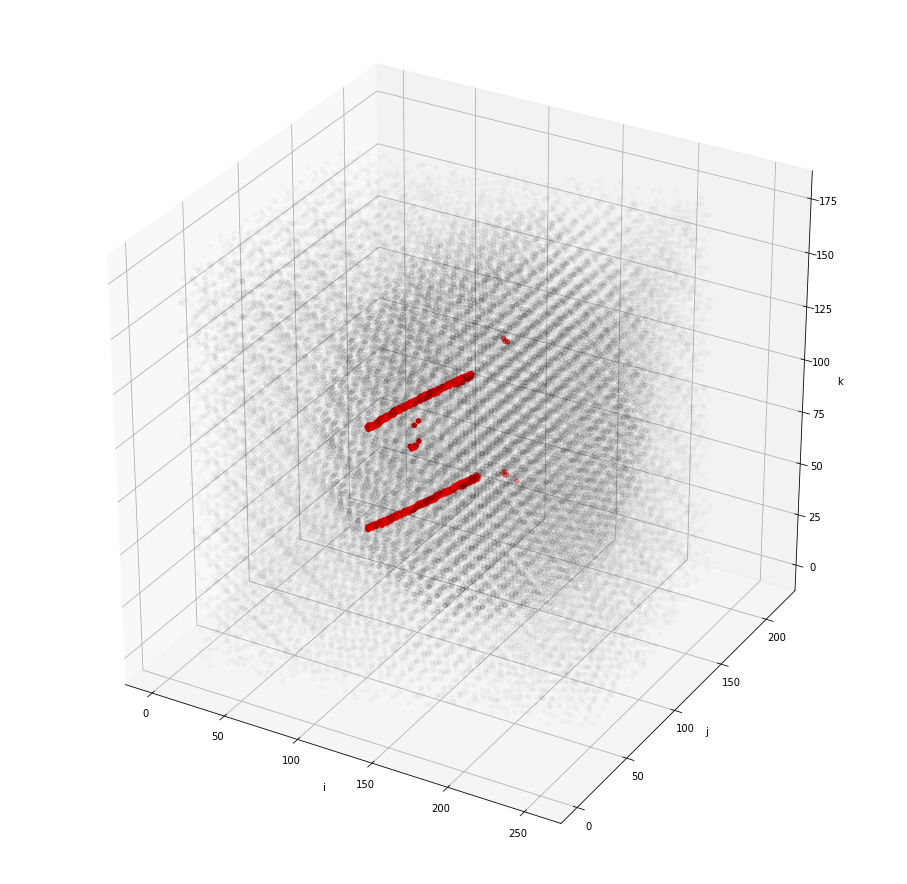

In [139]:
ax = vis.quick_plot_3D(
    long_postop,
    is_long=True,
    is_norm=True,
    alpha_max=.2,
    step_size=200,
)
vis.quick_plot_3D(
    thresh_filt,
    is_long=False,
    is_norm=True,
    alpha_max=1,
    step_size=1,
    ax=ax,
    base_color=(1,0,0)
)
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k');

## Get 2 largest connected region

In [140]:
label_im, nb_labels = ndimage.label(thresh_filt)
sizes = ndimage.sum(thresh_filt, label_im, range(nb_labels + 1))
second_largest = sizes[(-sizes).argsort()[1]]
mask = sizes >= second_largest
binary_img = mask[label_im]

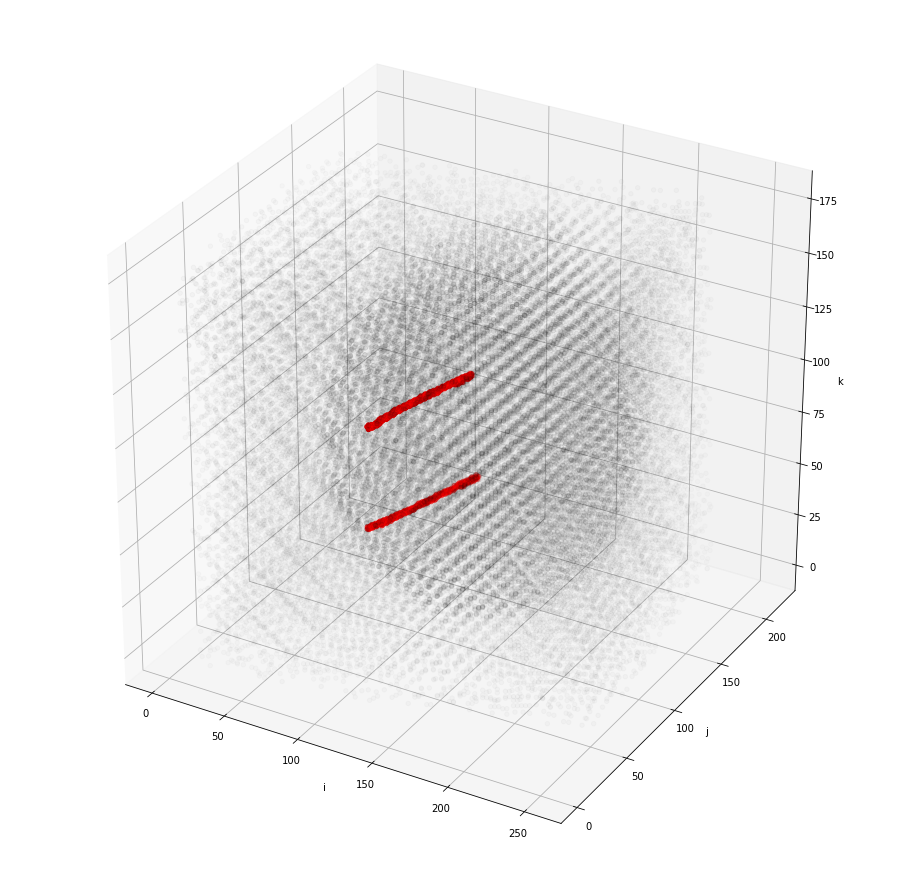

In [141]:
ax = vis.quick_plot_3D(
    long_postop,
    is_long=True,
    is_norm=True,
    alpha_max=.2,
    step_size=200,
)
vis.quick_plot_3D(
    binary_img,
    is_long=False,
    is_norm=True,
    alpha_max=1,
    step_size=1,
    ax=ax,
    base_color=(1,0,0)
)
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k');